# Data Wrangling: We Rate Dogs Twitter account

In [1]:
# Import 
import numpy as np
import pandas as pd
import requests
import tweepy
import json
import time
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sb

## Table of contents
<ul>
<li><a href="#gathering">Data gathering</a></li>
<li><a href="#assessment">Data assessment</a></li>
<li><a href="#cleaning">Data cleaning</a></li>
<li><a href="#saving">Saving</a></li>
<li><a href="#analysis">Analysis and visualisation</a></li>
</ul>

<a id='gathering'></a>
## Data gathering

In the first part of this project, the required data will be gathered from different sources. 

In [2]:
# Create a data frame from the provided .csv-file
df_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# Download the provided .tsv-file programmatically
r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

In [4]:
# Check success of request
r.status_code

200

In [5]:
# Write the downloaded object into a file
with open('image-predictions.tsv', mode = 'wb') as file:
    file.write(r.content)

In [6]:
# Create a data frame
df_images = pd.read_csv('image-predictions.tsv', sep='\t')

In [7]:
# Prepare for using the Twitter API
consumer_key = 'CONSUMER KEY'
consumer_secret = 'CONSUMER SECRET'
access_token = 'ACCESS TOKEN'
access_secret = 'ACCESS SECRET'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [8]:
# Query json data for each tweet ID in the Twitter archive of WeRateDogs
missing_ids = [] # initialise list
count = 1
start = time.time()

with open('tweet_json.txt', 'w') as outfile:
    for i in df_archive.tweet_id: # get each tweet ID
        try:
            # write the json data for each ID into a text file
            tweet = api.get_status(i, tweet_mode = 'extended')
            json.dump(tweet._json, outfile)
            outfile.write('\n') # add new line
        except tweepy.TweepError: 
            # catch error and write missing IDs into list
            missing_ids.append(i)
        print(count, ': Tweet ID ', i)
        count += 1
        
end = time.time()
print('Elapsed time: ', (end - start)/60, ' minutes')

1 : Tweet ID  892420643555336193
2 : Tweet ID  892177421306343426
3 : Tweet ID  891815181378084864
4 : Tweet ID  891689557279858688
5 : Tweet ID  891327558926688256
6 : Tweet ID  891087950875897856
7 : Tweet ID  890971913173991426
8 : Tweet ID  890729181411237888
9 : Tweet ID  890609185150312448
10 : Tweet ID  890240255349198849
11 : Tweet ID  890006608113172480
12 : Tweet ID  889880896479866881
13 : Tweet ID  889665388333682689
14 : Tweet ID  889638837579907072
15 : Tweet ID  889531135344209921
16 : Tweet ID  889278841981685760
17 : Tweet ID  888917238123831296
18 : Tweet ID  888804989199671297
19 : Tweet ID  888554962724278272
20 : Tweet ID  888202515573088257
21 : Tweet ID  888078434458587136
22 : Tweet ID  887705289381826560
23 : Tweet ID  887517139158093824
24 : Tweet ID  887473957103951883
25 : Tweet ID  887343217045368832
26 : Tweet ID  887101392804085760
27 : Tweet ID  886983233522544640
28 : Tweet ID  886736880519319552
29 : Tweet ID  886680336477933568
30 : Tweet ID  88636614

239 : Tweet ID  847116187444137987
240 : Tweet ID  846874817362120707
241 : Tweet ID  846514051647705089
242 : Tweet ID  846505985330044928
243 : Tweet ID  846153765933735936
244 : Tweet ID  846139713627017216
245 : Tweet ID  846042936437604353
246 : Tweet ID  845812042753855489
247 : Tweet ID  845677943972139009
248 : Tweet ID  845459076796616705
249 : Tweet ID  845397057150107648
250 : Tweet ID  845306882940190720
251 : Tweet ID  845098359547420673
252 : Tweet ID  844979544864018432
253 : Tweet ID  844973813909606400
254 : Tweet ID  844704788403113984
255 : Tweet ID  844580511645339650
256 : Tweet ID  844223788422217728
257 : Tweet ID  843981021012017153
258 : Tweet ID  843856843873095681
259 : Tweet ID  843604394117681152
260 : Tweet ID  843235543001513987
261 : Tweet ID  842892208864923648
262 : Tweet ID  842846295480000512
263 : Tweet ID  842765311967449089
264 : Tweet ID  842535590457499648
265 : Tweet ID  842163532590374912
266 : Tweet ID  842115215311396866
267 : Tweet ID  8418

474 : Tweet ID  816336735214911488
475 : Tweet ID  816091915477250048
476 : Tweet ID  816062466425819140
477 : Tweet ID  816014286006976512
478 : Tweet ID  815990720817401858
479 : Tweet ID  815966073409433600
480 : Tweet ID  815745968457060357
481 : Tweet ID  815736392542261248
482 : Tweet ID  815639385530101762
483 : Tweet ID  815390420867969024
484 : Tweet ID  814986499976527872
485 : Tweet ID  814638523311648768
486 : Tweet ID  814578408554463233
487 : Tweet ID  814530161257443328
488 : Tweet ID  814153002265309185
489 : Tweet ID  813944609378369540
490 : Tweet ID  813910438903693312
491 : Tweet ID  813812741911748608
492 : Tweet ID  813800681631023104
493 : Tweet ID  813217897535406080
494 : Tweet ID  813202720496779264
495 : Tweet ID  813187593374461952
496 : Tweet ID  813172488309972993
497 : Tweet ID  813157409116065792
498 : Tweet ID  813142292504645637
499 : Tweet ID  813130366689148928
500 : Tweet ID  813127251579564032
501 : Tweet ID  813112105746448384
502 : Tweet ID  8130

709 : Tweet ID  785264754247995392
710 : Tweet ID  785170936622350336
711 : Tweet ID  784826020293709826
712 : Tweet ID  784517518371221505
713 : Tweet ID  784431430411685888
714 : Tweet ID  784183165795655680
715 : Tweet ID  784057939640352768
716 : Tweet ID  783839966405230592
717 : Tweet ID  783821107061198850
718 : Tweet ID  783695101801398276
719 : Tweet ID  783466772167098368
720 : Tweet ID  783391753726550016
721 : Tweet ID  783347506784731136
722 : Tweet ID  783334639985389568
723 : Tweet ID  783085703974514689
724 : Tweet ID  782969140009107456
725 : Tweet ID  782747134529531904
726 : Tweet ID  782722598790725632
727 : Tweet ID  782598640137187329
728 : Tweet ID  782305867769217024
729 : Tweet ID  782021823840026624
730 : Tweet ID  781955203444699136
731 : Tweet ID  781661882474196992
732 : Tweet ID  781655249211752448
733 : Tweet ID  781524693396357120
734 : Tweet ID  781308096455073793
735 : Tweet ID  781251288990355457
736 : Tweet ID  781163403222056960
737 : Tweet ID  7809

944 : Tweet ID  752701944171524096
945 : Tweet ID  752682090207055872
946 : Tweet ID  752660715232722944
947 : Tweet ID  752568224206688256
948 : Tweet ID  752519690950500352
949 : Tweet ID  752334515931054080
950 : Tweet ID  752309394570878976
951 : Tweet ID  752173152931807232
952 : Tweet ID  751950017322246144
953 : Tweet ID  751937170840121344
954 : Tweet ID  751830394383790080
955 : Tweet ID  751793661361422336
956 : Tweet ID  751598357617971201
957 : Tweet ID  751583847268179968
958 : Tweet ID  751538714308972544
959 : Tweet ID  751456908746354688
960 : Tweet ID  751251247299190784
961 : Tweet ID  751205363882532864
962 : Tweet ID  751132876104687617
963 : Tweet ID  750868782890057730
964 : Tweet ID  750719632563142656
965 : Tweet ID  750506206503038976
966 : Tweet ID  750429297815552001
967 : Tweet ID  750383411068534784
968 : Tweet ID  750381685133418496
969 : Tweet ID  750147208377409536
970 : Tweet ID  750132105863102464
971 : Tweet ID  750117059602808832
972 : Tweet ID  7501

1174 : Tweet ID  720340705894408192
1175 : Tweet ID  720059472081784833
1176 : Tweet ID  720043174954147842
1177 : Tweet ID  719991154352222208
1178 : Tweet ID  719704490224398336
1179 : Tweet ID  719551379208073216
1180 : Tweet ID  719367763014393856
1181 : Tweet ID  719339463458033665
1182 : Tweet ID  719332531645071360
1183 : Tweet ID  718971898235854848
1184 : Tweet ID  718939241951195136
1185 : Tweet ID  718631497683582976
1186 : Tweet ID  718613305783398402
1187 : Tweet ID  718540630683709445
1188 : Tweet ID  718460005985447936
1189 : Tweet ID  718454725339934721
1190 : Tweet ID  718246886998687744
1191 : Tweet ID  718234618122661888
1192 : Tweet ID  717841801130979328
1193 : Tweet ID  717790033953034240
1194 : Tweet ID  717537687239008257
1195 : Tweet ID  717428917016076293
1196 : Tweet ID  717421804990701568
1197 : Tweet ID  717047459982213120
1198 : Tweet ID  717009362452090881
1199 : Tweet ID  716802964044845056
1200 : Tweet ID  716791146589110272
1201 : Tweet ID  71673037979

1402 : Tweet ID  699434518667751424
1403 : Tweet ID  699423671849451520
1404 : Tweet ID  699413908797464576
1405 : Tweet ID  699370870310113280
1406 : Tweet ID  699323444782047232
1407 : Tweet ID  699088579889332224
1408 : Tweet ID  699079609774645248
1409 : Tweet ID  699072405256409088
1410 : Tweet ID  699060279947165696
1411 : Tweet ID  699036661657767936
1412 : Tweet ID  698989035503689728
1413 : Tweet ID  698953797952008193
1414 : Tweet ID  698907974262222848
1415 : Tweet ID  698710712454139905
1416 : Tweet ID  698703483621523456
1417 : Tweet ID  698635131305795584
1418 : Tweet ID  698549713696649216
1419 : Tweet ID  698355670425473025
1420 : Tweet ID  698342080612007937
1421 : Tweet ID  698262614669991936
1422 : Tweet ID  698195409219559425
1423 : Tweet ID  698178924120031232
1424 : Tweet ID  697995514407682048
1425 : Tweet ID  697990423684476929
1426 : Tweet ID  697943111201378304
1427 : Tweet ID  697881462549430272
1428 : Tweet ID  697630435728322560
1429 : Tweet ID  69761677327

1630 : Tweet ID  684567543613382656
1631 : Tweet ID  684538444857667585
1632 : Tweet ID  684481074559381504
1633 : Tweet ID  684460069371654144
1634 : Tweet ID  684241637099323392
1635 : Tweet ID  684225744407494656
1636 : Tweet ID  684222868335505415
1637 : Tweet ID  684200372118904832
1638 : Tweet ID  684195085588783105
1639 : Tweet ID  684188786104872960
1640 : Tweet ID  684177701129875456
1641 : Tweet ID  684147889187209216
1642 : Tweet ID  684122891630342144
1643 : Tweet ID  684097758874210310
1644 : Tweet ID  683857920510050305
1645 : Tweet ID  683852578183077888
1646 : Tweet ID  683849932751646720
1647 : Tweet ID  683834909291606017
1648 : Tweet ID  683828599284170753
1649 : Tweet ID  683773439333797890
1650 : Tweet ID  683742671509258241
1651 : Tweet ID  683515932363329536
1652 : Tweet ID  683498322573824003
1653 : Tweet ID  683481228088049664
1654 : Tweet ID  683462770029932544
1655 : Tweet ID  683449695444799489
1656 : Tweet ID  683391852557561860
1657 : Tweet ID  68335797314

1858 : Tweet ID  675517828909424640
1859 : Tweet ID  675501075957489664
1860 : Tweet ID  675497103322386432
1861 : Tweet ID  675489971617296384
1862 : Tweet ID  675483430902214656
1863 : Tweet ID  675432746517426176
1864 : Tweet ID  675372240448454658
1865 : Tweet ID  675362609739206656
1866 : Tweet ID  675354435921575936
1867 : Tweet ID  675349384339542016
1868 : Tweet ID  675334060156301312
1869 : Tweet ID  675166823650848770
1870 : Tweet ID  675153376133427200
1871 : Tweet ID  675149409102012420
1872 : Tweet ID  675147105808306176
1873 : Tweet ID  675146535592706048
1874 : Tweet ID  675145476954566656
1875 : Tweet ID  675135153782571009
1876 : Tweet ID  675113801096802304
1877 : Tweet ID  675111688094527488
1878 : Tweet ID  675109292475830276
1879 : Tweet ID  675047298674663426
1880 : Tweet ID  675015141583413248
1881 : Tweet ID  675006312288268288
1882 : Tweet ID  675003128568291329
1883 : Tweet ID  674999807681908736
1884 : Tweet ID  674805413498527744
1885 : Tweet ID  67480052022

2086 : Tweet ID  670804601705242624
2087 : Tweet ID  670803562457407488
2088 : Tweet ID  670797304698376195
2089 : Tweet ID  670792680469889025
2090 : Tweet ID  670789397210615808
2091 : Tweet ID  670786190031921152
2092 : Tweet ID  670783437142401025
2093 : Tweet ID  670782429121134593
2094 : Tweet ID  670780561024270336
2095 : Tweet ID  670778058496974848
2096 : Tweet ID  670764103623966721
2097 : Tweet ID  670755717859713024
2098 : Tweet ID  670733412878163972
2099 : Tweet ID  670727704916926465
2100 : Tweet ID  670717338665226240
2101 : Tweet ID  670704688707301377
2102 : Tweet ID  670691627984359425
2103 : Tweet ID  670679630144274432
2104 : Tweet ID  670676092097810432
2105 : Tweet ID  670668383499735048
2106 : Tweet ID  670474236058800128
2107 : Tweet ID  670468609693655041
2108 : Tweet ID  670465786746662913
2109 : Tweet ID  670452855871037440
2110 : Tweet ID  670449342516494336
2111 : Tweet ID  670444955656130560
2112 : Tweet ID  670442337873600512
2113 : Tweet ID  67043582194

2314 : Tweet ID  666739327293083650
2315 : Tweet ID  666701168228331520
2316 : Tweet ID  666691418707132416
2317 : Tweet ID  666649482315059201
2318 : Tweet ID  666644823164719104
2319 : Tweet ID  666454714377183233
2320 : Tweet ID  666447344410484738
2321 : Tweet ID  666437273139982337
2322 : Tweet ID  666435652385423360
2323 : Tweet ID  666430724426358785
2324 : Tweet ID  666428276349472768
2325 : Tweet ID  666421158376562688
2326 : Tweet ID  666418789513326592
2327 : Tweet ID  666411507551481857
2328 : Tweet ID  666407126856765440
2329 : Tweet ID  666396247373291520
2330 : Tweet ID  666373753744588802
2331 : Tweet ID  666362758909284353
2332 : Tweet ID  666353288456101888
2333 : Tweet ID  666345417576210432
2334 : Tweet ID  666337882303524864
2335 : Tweet ID  666293911632134144
2336 : Tweet ID  666287406224695296
2337 : Tweet ID  666273097616637952
2338 : Tweet ID  666268910803644416
2339 : Tweet ID  666104133288665088
2340 : Tweet ID  666102155909144576
2341 : Tweet ID  66609951378

In [9]:
# Read text file with json data line by line
json_list = []
with open('tweet_json.txt') as file:
    for line in file:
        json_list.append(json.loads(line))

In [10]:
# Get tweet ids that have corresponding json data 
json_ids = np.array(df_archive.tweet_id[df_archive['tweet_id'].isin(missing_ids) == False])

In [11]:
# Write a data frame with the retweet and favorite counts
df_list = []
favorite_count = {}
for i in range(len(json_list)):
    df_list.append({'tweet_id': json_ids[i],
                    'retweet_count': json_list[i]['retweet_count'],
                    'favorite_count': json_list[i]['favorite_count']})
df_popularity = pd.DataFrame(df_list)

<a id='assessment'></a>
## Data assessment
In this part of the project, I will inspect the data to identify quality and tidiness issues. 

In [12]:
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [13]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [14]:
df_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
667,790337589677002753,NaN,NaN,2016-10-23 23:42:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Maggie. She can hear your cells divide. 1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/790337589...,12,10,Maggie,None,None,None,None
980,749774190421639168,NaN,NaN,2016-07-04 01:17:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lucy. She's a Benebop Cumberplop. 12/1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749774190...,12,10,Lucy,None,None,None,None
2003,672475084225949696,NaN,NaN,2015-12-03 17:58:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Buddy. He's photogenic af. Loves to se...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672475084...,8,10,Buddy,None,None,None,None
690,787397959788929025,NaN,NaN,2016-10-15 21:01:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Moose. He's rather h*ckin dangerous (y...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/787397959...,11,10,Moose,None,None,None,None
1956,673612854080196609,NaN,NaN,2015-12-06 21:19:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jeffri. He's a speckled ice pupper. Ve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673612854...,7,10,Jeffri,None,None,pupper,None


In [15]:
df_archive.name.value_counts()

None       745
a           55
Charlie     12
Lucy        11
Cooper      11
          ... 
Mingus       1
Stuart       1
Dylan        1
Lipton       1
Coleman      1
Name: name, Length: 957, dtype: int64

In [16]:
df_archive.name.value_counts().sample(20)

quite       4
Harrison    1
Emmie       1
Arnie       3
Brockly     1
Winston     9
Peanut      1
Roscoe      1
Ember       1
Tyrus       1
Rambo       1
Lilah       1
Mya         1
Snicku      1
Stormy      1
Mojo        1
Piper       2
Belle       2
Ben         1
Beya        1
Name: name, dtype: int64

In [17]:
# print the text of all tweet IDs with non-names to identify the errors
# get index of non-names
ind = df_archive.name.str.extract('(^[a-z]+$)').dropna().index
# print index and text for non-names
for i in ind:
    print(i, '--', df_archive.text[i])

22 -- I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba
56 -- Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af 
(IG: puffie_the_chow) https://t.co/ghXBIIeQZF
118 -- RT @dog_rates: We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10…
169 -- We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9
193 -- Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x
335 -- There's going to be a dog terminal at JFK Airport. This is not a drill. 10/10  
https://t.co/dp5h9bCwU7
369 -- Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK
542

In [18]:
df_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [19]:
df_archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [20]:
df_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [21]:
df_archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [22]:
df_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
0         2
15        2
75        2
420       2
182       1
204       1
143       1
121       1
99        1
20        1
45        1
27        1
17        1
24        1
26        1
44        1
50        1
60        1
80        1
84        1
88        1
1776      1
960       1
666       1
144       1
165       1
Name: rating_numerator, dtype: int64

In [23]:
# Print the text of all tweet IDs with unusual numerators to identify the errors
# Get unusual values
vals = df_archive.rating_numerator.value_counts()[df_archive.rating_numerator.value_counts() <=2].index
# Filter for unusual values
mask = df_archive.rating_numerator.isin(vals)
# Print index and text of unusual values
for i in df_archive.loc[mask, 'text'].index:
    print(i, '--', df_archive.text[i])

55 -- @roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s
188 -- @dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research
189 -- @s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10
285 -- RT @KibaDva: I collected all the good dogs!! 15/10 @dog_rates #GoodDogs https://t.co/6UCGFczlOI
290 -- @markhoppus 182/10
291 -- @bragg6of8 @Andy_Pace_ we are still looking for the first 15/10
313 -- @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
315 -- When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag
340 -- RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…
433 -- The floofs have been released I repeat the floofs have been released. 84/70 https://t

In [24]:
df_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
0         1
120       1
7         1
170       1
150       1
130       1
90        1
110       1
2         1
70        1
40        1
16        1
15        1
Name: rating_denominator, dtype: int64

In [25]:
# Print the text of all tweet IDs with unusual denominators to identify the errors
# Get unusual values
vals = df_archive.rating_denominator.value_counts()[df_archive.rating_denominator.value_counts() <=3].index
# Filter for unusual values
mask = df_archive.rating_denominator.isin(vals)
# Print index and text of unusual values
for i in df_archive.loc[mask, 'text'].index:
    print(i, '--', df_archive.text[i])

313 -- @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
342 -- @docmisterio account started on 11/15/15
433 -- The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
516 -- Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
784 -- RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…
902 -- Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
1068 -- After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
1120 -- Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
1165 -- Happy 4/20 from the squad! 13/10 for all ht

In [26]:
df_images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [27]:
df_images.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
717,685663452032069632,https://pbs.twimg.com/ext_tw_video_thumb/68566...,1,Chesapeake_Bay_retriever,0.171174,True,tennis_ball,0.090644,False,racket,0.048508,False
364,672884426393653248,https://pbs.twimg.com/media/CVaQ0M4UsAAki3t.jpg,1,tusker,0.122410,False,warthog,0.119870,False,water_buffalo,0.105856,False
789,690597161306841088,https://pbs.twimg.com/media/CZV-c9NVIAEWtiU.jpg,1,Lhasa,0.097500,True,koala,0.091934,False,sunglasses,0.091505,False
1409,770414278348247044,https://pbs.twimg.com/media/CrEPsfWXEAAKvem.jpg,1,maillot,0.580528,False,maillot,0.081449,False,golden_retriever,0.053570,True
528,676776431406465024,https://pbs.twimg.com/ext_tw_video_thumb/67677...,1,doormat,0.201346,False,dishwasher,0.191749,False,microwave,0.038110,False


In [28]:
df_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [29]:
df_popularity.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7326,34911
1,892177421306343426,5469,30234
2,891815181378084864,3616,22752
3,891689557279858688,7519,38180
4,891327558926688256,8078,36451


In [30]:
df_popularity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2331 non-null   int64
 1   retweet_count   2331 non-null   int64
 2   favorite_count  2331 non-null   int64
dtypes: int64(3)
memory usage: 54.8 KB


The following issues were found after executing the code above:
### Quality issues
#### `df_archive`
1. `df_archive` has more rows than `df_images`, so there are some tweets with no images (project requirements are to use only tweets with images)
2. Missing values in dog stage variables and `name` are marked as 'None' instead of NaN
3. `tweet_id`, `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id` and `retweeted_status_user_id` are floats instead of strings
4. Data frame contains retweets and replies but should only contain original tweets
5. Some names are wrong in `name`
    1. It seems that all incorrect name entries are spelt with lowercase letters. 
    2. Checking the text of these cases reveals that the expressions "named..." and "name is..." were not considered when extracting the names from the text
    3. Index no. 369 should have the name "Grace"
6. Some values in `rating_numerator` and `rating_denominator` appear to be wrong
    1. index of wrong values: [55, 313, 340, 342, 516, 763, 1068, 1165, 1202, 1662, 1712, 2335]
    2. correct values: [13/10, 13/10, 9.75/10, NaN, NaN, NaN, 11.27/10, 14/10, 13/10, 11/10, NaN, 11.26/10, 9/10]
7. `timestamp` and `retweeted_status_timestamp` columns are strings instead of dates. This will be ignored for two reasons, though:
    1. I do not intend to analyse any time based information
    2. When storing the data frame into a .csv-file, the date format will be lost again

#### `df_images`
8. Some images do not show dogs
9. There are three possible dog breeds for each image instead of one
10. Names of dog breeds are not formated consistently
11. `tweet_id` is int instead of string


#### `df_popularity`
12. Fewer number of tweet IDs than in the other data frames. Instead of trimming the other data frames, these will be accepted as missing values. No action required.
13. `tweet_id` is int instead of string

### Tidiness issues
14. `df_archive`: Dog stage variable is written as 4 columns but it should be one column
15. `df_archive`: Rating is separated into two columns but should be one variable in one column
16. `df_popularity`: Should not be a separate data frame but should be written into `df_archive`
17. `df_images`: The selected dog breed and jpg url should be written into `df_archive`

<a id='cleaning'></a>
## Data cleaning

In [31]:
# Make backup copies of all data frames
df_archive_raw = df_archive.copy()
df_images_raw = df_images.copy()
df_popularity_raw = df_popularity.copy()

### Issues 8 & 9: Some images do not show dogs in `df_images` (this needs to be fixed before I can tackle Issue 1) & there are three possible dog breeds for each image instead of one

##### Define
Exclude rows where `p1`, `p2` and `p3` are not a dog breed and define the "true breed" for each image by picking the breed prediction with the highest confidence.

##### Code

In [32]:
# Select only rows with at least one recognised dog breed
df_images = df_images[((df_images.p1_dog == True) | (df_images.p2_dog == True) | (df_images.p3_dog == True))] 

In [33]:
# Choose dog breed with biggest confidence in each row
for i in df_images.index:
    if (df_images.p1_conf[i] > df_images.p2_conf[i]) & (df_images.p1_dog[i] == True):
        df_images.loc[i,'selected_breed'] = df_images.loc[i,'p1']
    elif (df_images.p2_conf[i] > df_images.p3_conf[i]) & (df_images.p2_dog[i] == True):
        df_images.loc[i,'selected_breed'] = df_images.loc[i,'p2']
    else:
        df_images.loc[i,'selected_breed'] = df_images.loc[i,'p3']    

##### Test

In [34]:
# Check if selected breed is a dog breed and has the highest confidence
df_images.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,selected_breed
146,668627278264475648,https://pbs.twimg.com/media/CUdw9thWsAA4mB9.jpg,1,French_bulldog,0.965403,True,pug,0.008604,True,Boston_bull,0.008004,True,French_bulldog
1130,728035342121635841,https://pbs.twimg.com/media/ChqARqmWsAEI6fB.jpg,1,handkerchief,0.302961,False,Pomeranian,0.248664,True,Shih-Tzu,0.111015,True,Pomeranian
1431,773247561583001600,https://pbs.twimg.com/media/Crsgi9dWEAApQd8.jpg,1,seat_belt,0.713588,False,miniature_pinscher,0.083369,True,Brabancon_griffon,0.075696,True,miniature_pinscher
771,689517482558820352,https://pbs.twimg.com/media/CZGofjJW0AINjN9.jpg,1,Pembroke,0.799319,True,Cardigan,0.189537,True,papillon,0.003386,True,Pembroke
839,694356675654983680,https://pbs.twimg.com/media/CaLZtmsWQAApbFw.jpg,1,hamster,0.429871,False,Pomeranian,0.144272,True,pretzel,0.127220,False,Pomeranian
1114,724771698126512129,https://pbs.twimg.com/media/Cg7n_-OU8AA5RR1.jpg,2,German_short-haired_pointer,0.835491,True,bluetick,0.058788,True,English_setter,0.037208,True,German_short-haired_pointer
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True,miniature_poodle
315,671735591348891648,https://pbs.twimg.com/media/CVJ79MzW4AEpTom.jpg,2,stone_wall,0.271121,False,Irish_wolfhound,0.063078,True,poncho,0.048226,False,Irish_wolfhound
676,683462770029932544,https://pbs.twimg.com/media/CXwlw9MWsAAc-JB.jpg,1,Italian_greyhound,0.399560,True,whippet,0.267153,True,German_short-haired_pointer,0.081319,True,Italian_greyhound
923,702276748847800320,https://pbs.twimg.com/media/Cb78-nOWIAENNRc.jpg,1,Boston_bull,0.697303,True,French_bulldog,0.239015,True,American_Staffordshire_terrier,0.019838,True,Boston_bull


### Issue 1: `df_archive` has more rows than `df_images`

##### Define
Select only those tweet IDs in `df_archive` that are in `df_images`

##### Code

In [35]:
# Get tweet ids in df_images and filter df_archive
tweet_list = df_images.tweet_id.values
df_archive = df_archive[df_archive['tweet_id'].isin(tweet_list)]

##### Test

In [36]:
# Check if the two data frames have the same length
len(df_archive) == len(df_images)

True

### Issue 2: Missing values in dog stage variables and `name` are marked as 'None' instead of NaN in `df_archive`

##### Define
Replace 'None' with NaN

##### Code

In [37]:
df_archive = df_archive.replace('None', np.nan)

##### Test

In [38]:
# make sure that 'None' is no longer a value
df_archive.doggo.value_counts()

doggo    69
Name: doggo, dtype: int64

In [39]:
# Make sure that 'None' is no longer a value
df_archive.floofer.value_counts()

floofer    8
Name: floofer, dtype: int64

In [40]:
# Make sure that 'None' is no longer a value
df_archive.pupper.value_counts()

pupper    182
Name: pupper, dtype: int64

In [41]:
# Make sure that 'None' is no longer a value
df_archive.puppo.value_counts()

puppo    23
Name: puppo, dtype: int64

### Issues 3, 11 & 13: `tweet_id`, `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id` and `retweeted_status_user_id` have wrong data types in `df_archive`, `df_images` and `df_popularity`

##### Define
Change format `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id` and `retweeted_status_user_id` to int

##### Code

In [42]:
# Change data format
df_archive.tweet_id = df_archive.tweet_id.astype('object')
df_archive.in_reply_to_status_id = df_archive.in_reply_to_status_id.astype('object')
df_archive.in_reply_to_user_id = df_archive.in_reply_to_user_id.astype('object')
df_archive.retweeted_status_id = df_archive.retweeted_status_id.astype('object')
df_archive.retweeted_status_user_id = df_archive.retweeted_status_user_id.astype('object')

df_images.tweet_id = df_images.tweet_id.astype('object')

df_popularity.tweet_id = df_popularity.tweet_id.astype('object')

##### Test

In [43]:
# Check data type
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 1 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   tweet_id                    1751 non-null   object
 1   in_reply_to_status_id       20 non-null     object
 2   in_reply_to_user_id         20 non-null     object
 3   timestamp                   1751 non-null   object
 4   source                      1751 non-null   object
 5   text                        1751 non-null   object
 6   retweeted_status_id         65 non-null     object
 7   retweeted_status_user_id    65 non-null     object
 8   retweeted_status_timestamp  65 non-null     object
 9   expanded_urls               1751 non-null   object
 10  rating_numerator            1751 non-null   int64 
 11  rating_denominator          1751 non-null   int64 
 12  name                        1312 non-null   object
 13  doggo                       69 non-null     obje

In [44]:
# Check data type
df_images.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tweet_id        1751 non-null   object 
 1   jpg_url         1751 non-null   object 
 2   img_num         1751 non-null   int64  
 3   p1              1751 non-null   object 
 4   p1_conf         1751 non-null   float64
 5   p1_dog          1751 non-null   bool   
 6   p2              1751 non-null   object 
 7   p2_conf         1751 non-null   float64
 8   p2_dog          1751 non-null   bool   
 9   p3              1751 non-null   object 
 10  p3_conf         1751 non-null   float64
 11  p3_dog          1751 non-null   bool   
 12  selected_breed  1751 non-null   object 
dtypes: bool(3), float64(3), int64(1), object(6)
memory usage: 220.1+ KB


In [45]:
# Check data type
df_popularity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2331 non-null   object
 1   retweet_count   2331 non-null   int64 
 2   favorite_count  2331 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.8+ KB


### Issue 4: `df_archive` contains retweets and replies

##### Define
Filter `df_archive` to keep only those rows where `in_reply_to_status_id` and `retweeted_status_id` are NaNs. Then drop these columns because they are of no use.

##### Code (filter)

In [46]:
# Include only rows with no retweets and replies
df_archive = df_archive[(df_archive.in_reply_to_status_id.isnull()) & (df_archive.retweeted_status_id.isnull())] 

##### Test

In [47]:
# Check data type (before dropping)
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 1 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   tweet_id                    1666 non-null   object
 1   in_reply_to_status_id       0 non-null      object
 2   in_reply_to_user_id         0 non-null      object
 3   timestamp                   1666 non-null   object
 4   source                      1666 non-null   object
 5   text                        1666 non-null   object
 6   retweeted_status_id         0 non-null      object
 7   retweeted_status_user_id    0 non-null      object
 8   retweeted_status_timestamp  0 non-null      object
 9   expanded_urls               1666 non-null   object
 10  rating_numerator            1666 non-null   int64 
 11  rating_denominator          1666 non-null   int64 
 12  name                        1266 non-null   object
 13  doggo                       63 non-null     obje

##### Code (drop unused columns)

In [48]:
# Drop unused columns
df_archive = df_archive.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis = 1)

##### Test

In [49]:
# Make sure that columns were dropped
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 1 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            1666 non-null   object
 1   timestamp           1666 non-null   object
 2   source              1666 non-null   object
 3   text                1666 non-null   object
 4   expanded_urls       1666 non-null   object
 5   rating_numerator    1666 non-null   int64 
 6   rating_denominator  1666 non-null   int64 
 7   name                1266 non-null   object
 8   doggo               63 non-null     object
 9   floofer             8 non-null      object
 10  pupper              173 non-null    object
 11  puppo               22 non-null     object
dtypes: int64(2), object(10)
memory usage: 169.2+ KB


### Issue 5: Some names are wrong in `name`

##### Define
1. Extract and replace the names after the expressions "named..." and "name is..."
2. Replace the name with index 369 with "Grace"
3. Replace the remaining lowercase entries in `name` with NaNs

##### Code

In [50]:
# Get dataframe with non-names
ind = df_archive.name.str.extract('(^[a-z]+$)').dropna().index
df_archive_nonames = df_archive.loc[ind]

In [51]:
# Extract and replace names after "named..."
named = df_archive_nonames.text.str.extract('named\s([A-Z][a-z]+)[\s\.]').dropna().rename(columns={0:'name'})
df_archive.update(named)

In [52]:
# Extract and replace names after "name is..."
name_is = df_archive_nonames.text.str.extract('name is\s([A-Z][a-z]+)[\s\.]').dropna().rename(columns={0:'name'})
df_archive.update(name_is)

In [53]:
# Replace name at index 369 with "Grace"
grace = pd.Series('Grace', name='name', index=[369])
df_archive.update(grace)

In [54]:
# Replace the rest of the wrong names with NaNs
rest_ind = []
for i in ind:
    if i not in np.concatenate((np.array(named.index), np.array(name_is.index), [369])):
        df_archive.replace(df_archive.name.loc[i], np.nan, inplace = True)

##### Test

In [55]:
# Check entries of non-names (most of them should be NaN)
df_archive.loc[ind]['name']

56        NaN
169       NaN
193       NaN
369     Grace
542       NaN
        ...  
2348      NaN
2350      NaN
2352      NaN
2353      NaN
2354      NaN
Name: name, Length: 80, dtype: object

In [56]:
# Check entries of the names extracted after "named..."
df_archive.loc[np.array(named.index)]['name']

1853        Wylie
1955          Kip
2034        Jacob
2066        Rufus
2116        Spork
2128        Hemry
2161      Alfredo
2191        Leroi
2204        Berta
2218         Chuk
2235      Alfonso
2249       Cheryl
2255      Jessiga
2264        Klint
2273         Kohl
2311    Octaviath
2314         Johm
Name: name, dtype: object

In [57]:
# Check entries of the names extracted after "name is..."
df_archive.loc[np.array(name_is.index)]['name']

852      Zoey
2287    Daryl
Name: name, dtype: object

In [58]:
# Check entry at index 369
df_archive.loc[grace.index]['name']

369    Grace
Name: name, dtype: object

### Issues 6 & 15: Some values in `rating_numerator` and `rating_denominator` appear to be wrong & rating is separated into two columns but should be one variable in one column

##### Define
1. Calculate rating as one number and write it into one column
2. Set the values with index [55, 313, 340, 342, 516, 763, 1068, 1165, 1202, 1662, 1712, 2335] to [13/10, 13/10, 9.75/10, NaN, NaN, NaN, 11.27/10, 14/10, 13/10, 11/10, NaN, 11.26/10, 9/10]
3. Drop unsused columns

##### Code

In [59]:
# Define a series with indices and values as defined in the data assessment
new_rating_index = [55, 313, 340, 342, 516, 763, 1068, 1165, 1202, 1662, 1712, 2335]
new_rating = [13/10, 13/10, 9.75/10, np.nan, np.nan, 11.27/10, 14/10, 13/10, 11/10, np.nan, 11.26/10, 9/10]
new_rating = pd.Series(new_rating, name='rating', index=new_rating_index)

In [60]:
ind = []
for i in df_archive.index:
    if i in new_rating_index: # check if index is still present or was deleted in previous cleaning actions
        df_archive.loc[i, 'rating'] = new_rating[i] # change values according to new_rating
        ind.append(i) # write changed indices into list
    else:
        df_archive.loc[i, 'rating'] = df_archive.rating_numerator[i] / df_archive.rating_denominator[i] # calculate rating

In [61]:
# Drop unused columns
df_archive = df_archive.drop(['rating_numerator','rating_denominator'], axis = 1)

##### Test

In [62]:
# Check changed ratings changed according to new_rating
df_archive.loc[ind,'rating']

516       NaN
763     1.127
1068    1.400
1165    1.300
1202    1.100
1662      NaN
1712    1.126
2335    0.900
Name: rating, dtype: float64

In [63]:
# Check new column
df_archive.sample(10)

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,rating
732,781524693396357120,2016-09-29 16:03:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Idk why this keeps happening. We only rate dog...,https://twitter.com/dog_rates/status/781524693...,NaN,NaN,NaN,NaN,NaN,1.2
915,757354760399941633,2016-07-24 23:20:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Devón (pronounced ""Eric""). He forgot h...",https://twitter.com/dog_rates/status/757354760...,Devón,NaN,NaN,NaN,NaN,0.8
1516,690959652130045952,2016-01-23 18:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This golden is happy to refute the soft mouth ...,https://twitter.com/dog_rates/status/690959652...,NaN,NaN,NaN,NaN,NaN,1.1
1635,684222868335505415,2016-01-05 04:00:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Someone help the girl is being mugged. Several...,https://twitter.com/dog_rates/status/684222868...,NaN,NaN,NaN,NaN,NaN,1.1
693,786963064373534720,2016-10-14 16:13:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rory. He's got an interview in a few m...,https://twitter.com/dog_rates/status/786963064...,Rory,NaN,NaN,NaN,NaN,1.2
94,874012996292530176,2017-06-11 21:18:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sebastian. He can't see all the colors...,https://twitter.com/dog_rates/status/874012996...,Sebastian,NaN,NaN,NaN,puppo,1.3
1233,712809025985978368,2016-03-24 01:11:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stubert. He just arrived. 10/10 https:...,https://twitter.com/dog_rates/status/712809025...,Stubert,NaN,NaN,NaN,NaN,1.0
1084,738402415918125056,2016-06-02 16:10:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Don't talk to me or my son ever again"" ...10/...",https://twitter.com/dog_rates/status/738402415...,NaN,NaN,NaN,NaN,NaN,1.0
560,802952499103731712,2016-11-27 19:09:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Marley. She's having a ruff day. Prett...,https://twitter.com/dog_rates/status/802952499...,Marley,NaN,NaN,NaN,NaN,1.2
1361,703079050210877440,2016-02-26 04:48:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Butternut Cumberfloof. It's not wind...,https://twitter.com/dog_rates/status/703079050...,NaN,NaN,NaN,NaN,NaN,1.1


 ### Issue 10: Names of dog breeds are not formated consistently 

##### Define
Replace the underscore(s) in `selected_breed` and capitalise the first letters of each word

##### Code

In [64]:
# Replace underscores and capitalise
df_images.selected_breed = df_images.selected_breed.str.replace('_',' ').str.title()

##### Test

In [65]:
# Check new names of dog breeds
df_images.selected_breed.sample(20)

1124                         Chihuahua
1989                Labrador Retriever
939                              Boxer
620                   Lakeland Terrier
1876                           Samoyed
1731                        Pomeranian
1478                     Saint Bernard
282                           Shih-Tzu
1123             Flat-Coated Retriever
932                             Kuvasz
90                   Yorkshire Terrier
158                Miniature Schnauzer
846                        Maltese Dog
805                      Saint Bernard
690                          Chihuahua
818        Soft-Coated Wheaten Terrier
875                 Labrador Retriever
928                   Golden Retriever
1017                          Pembroke
1724    American Staffordshire Terrier
Name: selected_breed, dtype: object

### Issue 14: Dog stage variable is written as 4 columns but it should be one column in `df_archive`

##### Define
Write dog stages into one column and delete the unused columns

##### Code

In [66]:
for line in df_archive.index: # go through each line 
    for val in df_archive.loc[line,['doggo','floofer','pupper','puppo']]: # go through each value in a line
        if val in ['doggo','floofer','pupper','puppo']:
            df_archive.loc[line,'dog_stage'] = val

In [67]:
# Drop unused columns
df_archive = df_archive.drop(['doggo','floofer','pupper','puppo'], axis = 1)

##### Test

In [68]:
# Check new column
df_archive.sample(10)

,tweet_id,timestamp,source,text,expanded_urls,name,rating,dog_stage
503,813066809284972545,2016-12-25 17:00:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tyr. He is disgusted by holiday traffi...,https://twitter.com/dog_rates/status/813066809...,Tyr,1.2,NaN
172,858843525470990336,2017-05-01 00:40:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have stumbled puppon a doggo painting party....,https://twitter.com/dog_rates/status/858843525...,NaN,1.3,doggo
1282,708738143638450176,2016-03-12 19:35:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Coco. She gets to stay on the Bachelor...,https://twitter.com/dog_rates/status/708738143...,Coco,1.1,NaN
1417,698549713696649216,2016-02-13 16:50:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Claude. He's trying to be seductive bu...,https://twitter.com/dog_rates/status/698549713...,Claude,0.9,NaN
1111,733482008106668032,2016-05-20 02:18:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Ello this is dog how may I assist"" ...10/10 h...",https://twitter.com/dog_rates/status/733482008...,NaN,1.0,NaN
1167,721503162398597120,2016-04-17 00:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Panda. He's happy af. 11/10 https://t....,https://twitter.com/dog_rates/status/721503162...,Panda,1.1,NaN
765,777885040357281792,2016-09-19 15:00:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Wesley. He's clearly trespassing. Seem...,https://twitter.com/dog_rates/status/777885040...,Wesley,0.3,NaN
2194,668892474547511297,2015-11-23 20:42:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ruffles. He is an Albanian Shoop Da Wh...,https://twitter.com/dog_rates/status/668892474...,Ruffles,1.1,NaN
614,796759840936919040,2016-11-10 17:02:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Romeo. He was just told that it's...,https://twitter.com/dog_rates/status/796759840...,Romeo,1.1,NaN
718,783466772167098368,2016-10-05 00:40:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Finn. He likes eavesdropping from fili...,https://twitter.com/dog_rates/status/783466772...,Finn,1.1,NaN


### Issue 16: `df_popularity` should not be a separate data frame but should be written into `df_archive`

##### Define
Merge `df_popularity` and `df_archive` into one data frame

##### Code

In [69]:
# Merge the two data frames and change data types of new columns to 'int'
df_archive = df_archive.merge(df_popularity, how = 'left', on = 'tweet_id')
df_archive.retweet_count = df_archive.retweet_count.astype('Int64')
df_archive.favorite_count = df_archive.favorite_count.astype('Int64')

##### Test

In [70]:
# Check new columns and their data type
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 0 to 1665
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tweet_id        1666 non-null   object 
 1   timestamp       1666 non-null   object 
 2   source          1666 non-null   object 
 3   text            1666 non-null   object 
 4   expanded_urls   1666 non-null   object 
 5   name            1206 non-null   object 
 6   rating          1664 non-null   float64
 7   dog_stage       257 non-null    object 
 8   retweet_count   1659 non-null   Int64  
 9   favorite_count  1659 non-null   Int64  
dtypes: Int64(2), float64(1), object(7)
memory usage: 146.4+ KB


### Issue 17: `selected_breed` and `jpg_url` in `df_images` should be written into `df_archive`

##### Define
Merge the `selected_breed` and `jpg_url` columns of `df_images` and `df_archive` into one data frame

##### Code

In [71]:
df_archive = df_archive.merge(df_images[['tweet_id','selected_breed','jpg_url']], how = 'left', on = 'tweet_id')

##### Test

In [72]:
# Check new column
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 0 to 1665
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tweet_id        1666 non-null   object 
 1   timestamp       1666 non-null   object 
 2   source          1666 non-null   object 
 3   text            1666 non-null   object 
 4   expanded_urls   1666 non-null   object 
 5   name            1206 non-null   object 
 6   rating          1664 non-null   float64
 7   dog_stage       257 non-null    object 
 8   retweet_count   1659 non-null   Int64  
 9   favorite_count  1659 non-null   Int64  
 10  selected_breed  1666 non-null   object 
 11  jpg_url         1666 non-null   object 
dtypes: Int64(2), float64(1), object(9)
memory usage: 172.5+ KB


<a id='saving'></a>
## Saving

In [73]:
# Save the master data frame to a csv-file
df_archive.to_csv('twitter_archive_master.csv', index=False)

<a id='analysis'></a>
## Analysis and visalisation

There are three questions I would like to answer:
1. Which tweet was retweeted the most?
2. Which dog breed was retweeted the most?
3. Which dog breed received the most "likes"?

In [75]:
# Get image url of tweet with the most retweets and download file
mask = df_archive.retweet_count == df_archive.retweet_count.max()
ind_max_retweet = df_archive.text[mask].index[0]
url = df_archive.jpg_url.loc[ind_max_retweet]
r = requests.get(url)

In [76]:
# Write the downloaded object into a file
with open('max_retweeted_image.jpg', mode = 'wb') as file:
    file.write(r.content)

In [77]:
# Get image and text of tweet with the most retweets 
max_retweeted_image = mpimg.imread('max_retweeted_image.jpg')
max_retweeted_text = df_archive.text[mask].values[0]
max_retweeted_text = max_retweeted_text[:max_retweeted_text.rfind('https')] # strip off tweet url

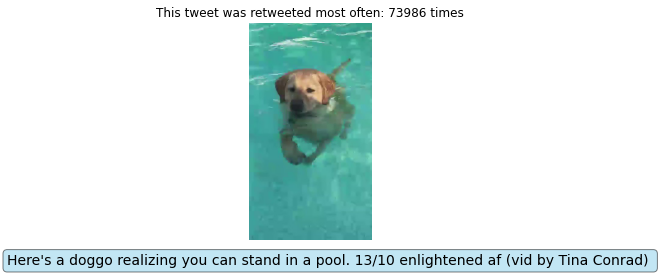

In [78]:
# Plot
fig, ax = plt.subplots()
ax.imshow(max_retweeted_image);
props = dict(boxstyle='round', facecolor='skyblue', alpha=0.5)
ax.text(-800, 800, max_retweeted_text, fontsize=14, bbox=props);
plt.axis('off');
plt.title('This tweet was retweeted most often: {} times'.format(df_archive.retweet_count.max()));

The above image shows the tweet text and image that was retweeted most often.

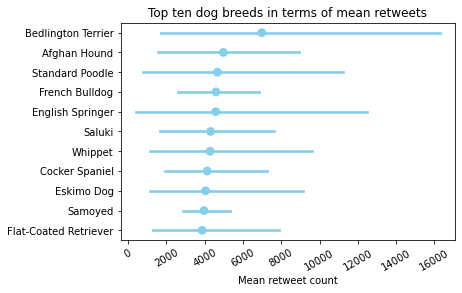

In [79]:
# Group by dog breed and get the top ten of mean retweets per breed 
top_retweeted_breeds = df_archive.groupby('selected_breed').mean().retweet_count.sort_values(axis=0,ascending=False).index[:11]
# Get data frame with top ten dog breeds 
df_top_breeds = df_archive[df_archive.selected_breed.isin(top_retweeted_breeds)]
# Plot the top ten dog breeds
sb.pointplot(x = df_top_breeds.retweet_count, y = df_top_breeds.selected_breed, 
             color = 'skyblue', order = top_retweeted_breeds, linestyles='');
plt.xticks(rotation=30);
plt.xlabel('Mean retweet count');
plt.ylabel('');
plt.title('Top ten dog breeds in terms of mean retweets');

This image shows the top ten dogs in terms of mean retweets. Tweets with Bedlington Terrier dogs were retweeted most often. However, the spread of the retweet counts is quite high. Some individual tweets of the other top ten breeds were retweeted more often than the mean retweets of the Bedlington Terriers, for example the Standard Poodle or the English Springer.

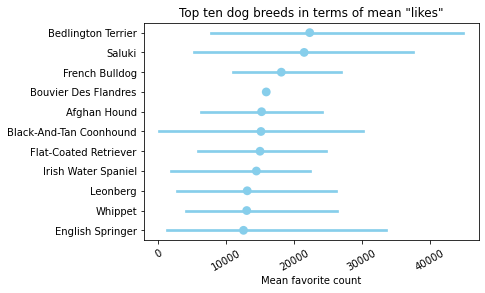

In [80]:
# Group by dog breed and get the top ten of mean likes per breed 
top_favorite_breeds = df_archive.groupby('selected_breed').mean().favorite_count.sort_values(axis=0,ascending=False).index[:11]
# Get data frame with top ten dog breeds 
df_top_breeds = df_archive[df_archive.selected_breed.isin(top_favorite_breeds)]
# Plot the top ten dog breeds
sb.pointplot(x = df_top_breeds.favorite_count, y = df_top_breeds.selected_breed, 
           color = 'skyblue', order = top_favorite_breeds, linestyles='');
plt.xlabel('Mean favorite count');
plt.ylabel('');
plt.title('Top ten dog breeds in terms of mean "likes"');
plt.xticks(rotation=30);

The top ten dog breeds in terms of mean "likes" are different than the ones in terms of retweets. Even though the first place is also held by the Bedlington Terrier, it is very similar to the mean favourite count of the Saluki dogs. 